In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import * 
from dec2bin import *

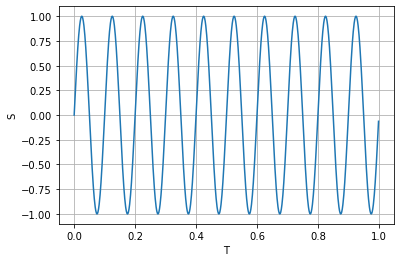

In [18]:
fe = 1000  #freq d'ech 1Khz
te = 1/fe  # période d'echch
f=10  #freq  porteuse
t=np.arange(0,1,te) #axe des x
n = 3 #nombre de bits de codage

s=[sin(2*pi*f*i) for i in t]   #fonction échantilloné
plt.xlabel("T")
plt.ylabel("S")
plt.plot(t,s)
plt.grid(True)

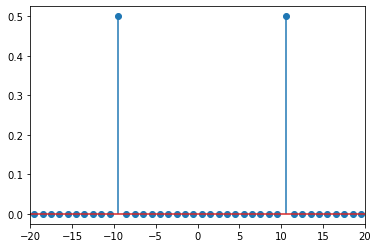

In [27]:
N=len(t)
#Transformée de Fourrier
ft = np.linspace(-fe/2,fe/2,N)
sff=np.fft.fftshift(np.fft.fft(s)) #s(t) contient N point --> fft --> S(F) contient Npoint {0-fe}
sf = (1/N)*sff
figure=plt.figure()
axis=figure.add_subplot(111)
axis.set_xlim(-20,20)
plt.stem(ft,abs(sf)) #spectre de signal echantillonee
plt.show()

/home/roua/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


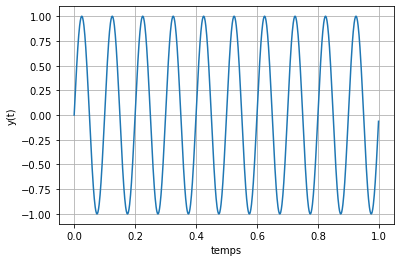

In [32]:
#Transformée de Fourrier inverse
y=np.fft.ifft(N*np.fft.ifftshift(sf)) 
plt.xlabel('T') 
plt.ylabel('y(t)')
plt.plot(t,y) 
plt.grid(True)

0.25


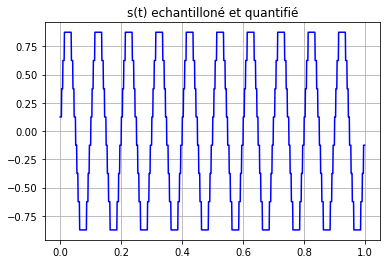

In [34]:
smin=min(s) #determiner la valeur min du signal
smax=max(s) #determiner la valeur max du signal
pas=(smax-smin)/(2**n)   #calcule du pas
print(pas)
sig=[floor((s[i]-smin)/pas) for i in range(len(s))]   #amplitude du signal quantifié

sq=[smin+pas*sig[i]+(pas/2) for i in range(len(sig))]   #générer la séquence quantifié
for i in range(len(sq)):
    if (sq[i] >= smax):
        sq[i]=smax-pas/2
plt.title('s(t) echantilloné et quantifié');
plt.grid(True)
plt.plot(t,sq,'b')   #afficher le signal quantifié avec une couleur bleu
#plt.legend('Echantiloné','Quantifié'); 

['100', '100', '100', '100', '100', '101', '101', '101', '101', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '1000', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '110', '110', '110', '101', '101', '101', '101', '100', '100', '100', '100', '100', '11', '11', '11', '11', '10', '10', '10', '10', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '10', '10', '10', '10', '11', '11', '11', '11', '11', '100', '100', '100', '100', '101', '101', '101', '101', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '1000', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '110', '110', '110', '101', '101', '101', '101', '100', '100', '100', '100', '100', '11', '11', '11', '11',

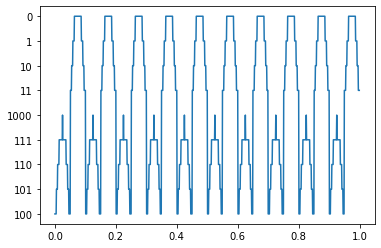

In [16]:
num = [dec2bin(sig[i]) for i in range(len(sig))] #codage
#np.disp(num)

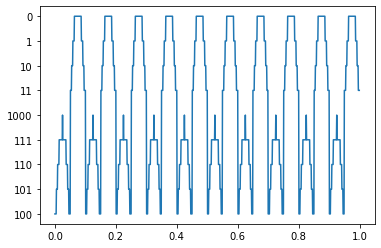

In [17]:
plt.plot(t,num)